In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn import svm, grid_search
from sklearn.model_selection import train_test_split
import glob
import pickle
import time

%matplotlib inline

C:\Users\rohanr730\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rohanr730\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from features import *
from sliding_window import *

In [6]:
cars_kitti = glob.glob('vehicles/KITTI_extracted/*.png')
cars_gti_right = glob.glob('vehicles/GTI_Right/image*.png')
cars_gti_middle_close = glob.glob('vehicles/GTI_MiddleClose/image*.png')
cars_gti_left = glob.glob('vehicles/GTI_Left/image*.png')
cars_gti_far = glob.glob('vehicles/GTI_Far/image*.png')

In [7]:
cars = cars_kitti + cars_gti_right + cars_gti_left + cars_gti_far + cars_gti_middle_close

In [8]:
cars_kitti

['vehicles/KITTI_extracted\\1.png',
 'vehicles/KITTI_extracted\\10.png',
 'vehicles/KITTI_extracted\\1000.png',
 'vehicles/KITTI_extracted\\1001.png',
 'vehicles/KITTI_extracted\\1002.png',
 'vehicles/KITTI_extracted\\1003.png',
 'vehicles/KITTI_extracted\\1004.png',
 'vehicles/KITTI_extracted\\1005.png',
 'vehicles/KITTI_extracted\\1006.png',
 'vehicles/KITTI_extracted\\1007.png',
 'vehicles/KITTI_extracted\\1008.png',
 'vehicles/KITTI_extracted\\1009.png',
 'vehicles/KITTI_extracted\\101.png',
 'vehicles/KITTI_extracted\\1010.png',
 'vehicles/KITTI_extracted\\1011.png',
 'vehicles/KITTI_extracted\\1012.png',
 'vehicles/KITTI_extracted\\1013.png',
 'vehicles/KITTI_extracted\\1014.png',
 'vehicles/KITTI_extracted\\1015.png',
 'vehicles/KITTI_extracted\\1016.png',
 'vehicles/KITTI_extracted\\1017.png',
 'vehicles/KITTI_extracted\\1018.png',
 'vehicles/KITTI_extracted\\1019.png',
 'vehicles/KITTI_extracted\\102.png',
 'vehicles/KITTI_extracted\\1020.png',
 'vehicles/KITTI_extracted\\1021

In [9]:
notcars_gti = glob.glob('non-vehicles/GTI/image*.png')
notcars_extras = glob.glob('non-vehicles/Extras/extra*.png')

In [10]:
notcars = notcars_gti + notcars_extras

(64, 64, 3)

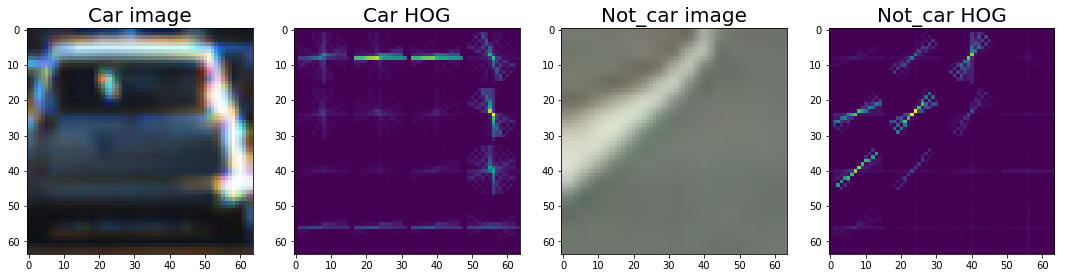

In [11]:
#Visualize features

orient = 30
pix_per_cell = 16
cell_per_block = 2
hog_channel = 0

# np.random.seed(222)
idx = np.random.randint(0, len(cars))
car_img = cv2.cvtColor((cv2.imread(cars[idx])), cv2.COLOR_BGR2RGB)
notcar_img = cv2.cvtColor((cv2.imread(notcars[idx])), cv2.COLOR_BGR2RGB)
car_features, car_hog = get_hog_features(car_img[:,:,hog_channel], orient = orient, pix_per_cell = pix_per_cell, 
                                         cell_per_block = cell_per_block, vis = True)
notcar_features, notcar_hog = get_hog_features(notcar_img[:,:,hog_channel], orient = orient, pix_per_cell = pix_per_cell,
                                               cell_per_block = cell_per_block, vis = True)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 15))
f.tight_layout()
ax1.imshow(car_img)
ax1.set_title('Car image', fontsize = 20)
ax2.imshow(car_hog)
ax2.set_title('Car HOG', fontsize = 20)
ax3.imshow(notcar_img)
ax3.set_title('Not_car image', fontsize = 20)
ax4.imshow(notcar_hog)
ax4.set_title('Not_car HOG', fontsize = 20)
car_img.shape

In [12]:
%%time

cspace = 'YCrCb'
orient = 30
spatial_size = (32,32)
hist_bins = 32
hist_range = (0, 256)
pix = 16
cell = 2
hog_channel = 'ALL'

car_features = extract_features(cars, cspace=cspace, orient=orient, spatial_size=spatial_size, hist_bins=hist_bins,
                                hist_range=hist_range, pix=pix, cell=cell, hog_channel=hog_channel, path=True)
notcar_features = extract_features(notcars, cspace=cspace, orient=orient, spatial_size=spatial_size, hist_bins=hist_bins,
                                   hist_range=hist_range, pix=pix, cell=cell, hog_channel=hog_channel, path=True)

Wall time: 5min 8s


In [13]:
len(notcar_features[0])

6408

In [14]:
X = np.vstack((car_features, notcar_features, notcar_features, notcar_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)
y = np.hstack((np.ones(len(car_features)), np.zeros(3 * len(notcar_features))))

In [15]:
scaled_X

array([[-0.18776926, -0.34834576, -0.41796834, ..., -0.00916788,
         0.        ,  0.        ],
       [-0.16882663, -0.19303223, -0.30790776, ..., -0.00916788,
         0.        ,  0.        ],
       [-0.19669148, -0.26474949, -0.56359252, ..., -0.00916788,
         0.        ,  0.        ],
       ...,
       [-0.13552804, -0.12094182, -0.14860718, ..., -0.00916788,
         0.        ,  0.        ],
       [-0.15236804,  0.35707183,  0.29898108, ..., -0.00916788,
         0.        ,  0.        ],
       [-0.15414534, -0.09519122,  0.64128649, ..., -0.00916788,
         0.        ,  0.        ]])

In [12]:
scaled_X.shape

(35696, 6408)

In [13]:
%%time

clf = svm.SVC(kernel = 'linear', C=0.1)
# parameters = {'C':[0.1, 1, 10]}
# clf = grid_search.GridSearchCV(svr, parameters)

Wall time: 4 ms


In [14]:
%%time

rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
clf.fit(X_train, y_train)

Wall time: 4min 31s


In [15]:
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))

Test Accuracy of SVC =  0.9958


In [24]:
# Only run this cell when saving a new model

pickle.dump(clf, open('models/linearsvc_ycrcb_all_hog.p', "wb"))
pickle.dump(X_scaler, open('models/x_scaler_ycrcb_all_hog.p', "wb"))

In [16]:
classifier = pickle.load(open('models/linearsvc_ycrcb_all_hog.p', "rb"))
X_scaler = pickle.load(open('models/x_scaler_ycrcb_all_hog.p', "rb"))

C:\Users\rohanr730\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator SVC from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\rohanr730\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [17]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
test_img = cv2.imread('test_images/test6.jpg')

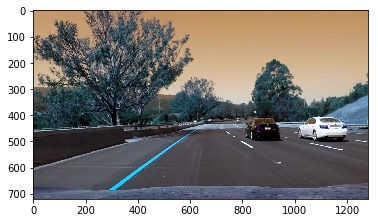

In [19]:
plt.imshow(test_img)

In [20]:
cspace = 'YCrCb'
orient = 30
spatial_size = (32,32)
hist_bins = 32
hist_range = (0, 256)
pix = 16
cell = 2
hog_channel = 'ALL'

features = extract_features(test_img, cspace, orient, spatial_size, hist_bins, hist_range, pix, cell, hog_channel, path=False)

In [21]:
x_start_stop = [200, 1280]
# y_start_stop = [None, None]
y_start_stop = [400, 500]
# y_start_stop = [img.shape[0]//2, xy_window[0] * img.shape[0]//xy_window[0]]
xy_window = [(96, 96)]
xy_overlap = (0.7, 0.7)

total_windows = []
total_detections = []

for window_size in xy_window:
    
    start_time = time.time()
    window_list = []
    window_list = slide_window(test_img, x_start_stop, y_start_stop, window_size, xy_overlap)
    detections = search_windows(test_img, window_list, classifier, X_scaler, color_space = cspace, hog_channel = 'ALL')
    total_windows.append(window_list)
    total_detections.append(detections)
    end_time = time.time()
    print('Time taken to calculate', len(detections), 'detections with ', window_size, ' windows = ', (end_time - start_time), 'seconds')
# window_list

ValueError: operands could not be broadcast together with shapes (1,8460) (3240,) (1,8460) 

In [10]:
# %%time
# detections = search_windows(test_img, window_list, classifier, X_scaler, color_space = cspace, hog_channel = 'ALL')

In [11]:
def add_heat(heatmap, bboxes):
    
    for bbox in bboxes:
        heatmap[bbox[0][1]:bbox[1][1], bbox[0][0]:bbox[1][0]] += 1
        
    return heatmap

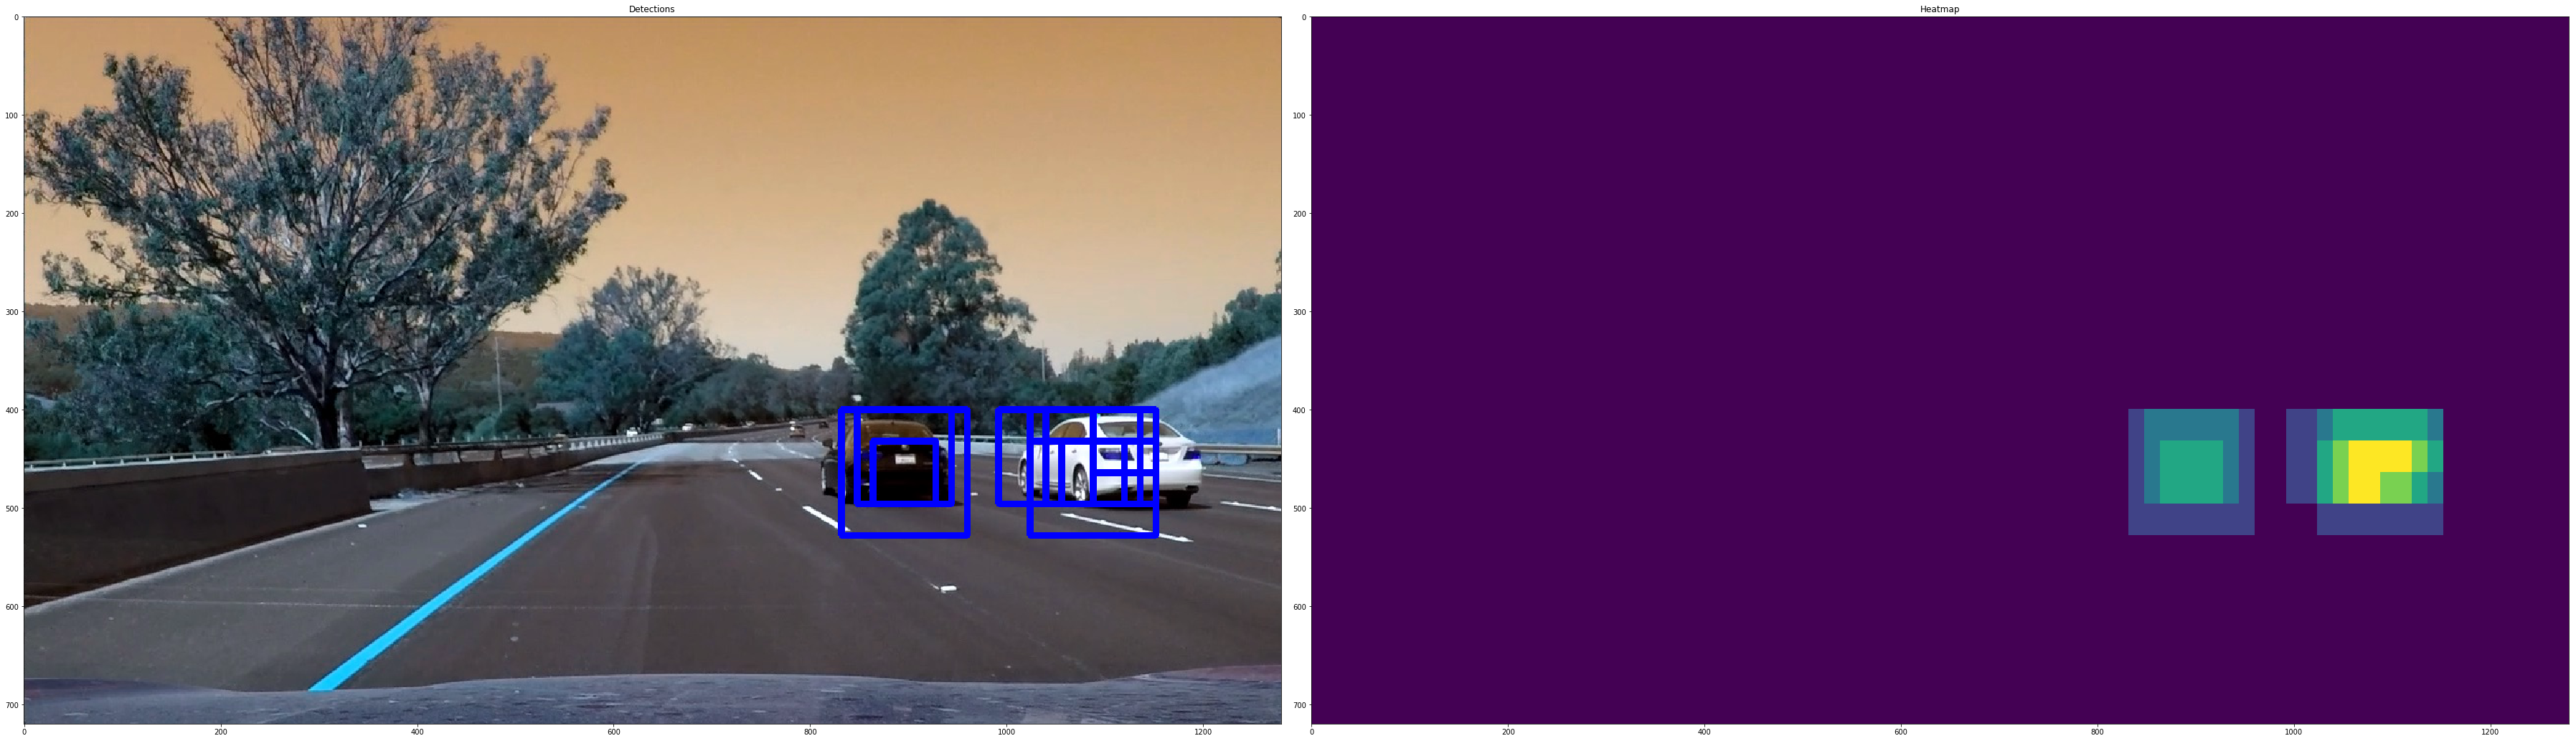

In [12]:
superimposed = np.copy(test_img)
heatmap = np.zeros_like(superimposed[:,:,0])

for each_scale in total_detections:
    if len(each_scale) > 0:
        superimposed = draw_boxes(superimposed, each_scale)
        example = add_heat(heatmap, each_scale)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (50, 50))
f.tight_layout()
ax1.set_title('Detections')
ax1.imshow(superimposed)
ax2.set_title('Heatmap')
ax2.imshow(example)

In [13]:
def threshold(heatmap, threshold = 2):
    
    heatmap[heatmap <= threshold] = 0
    
    return heatmap

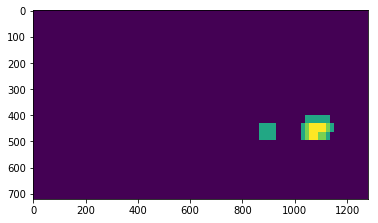

In [14]:
thresholded_heatmap = threshold(heatmap, 2)
plt.imshow(thresholded_heatmap)

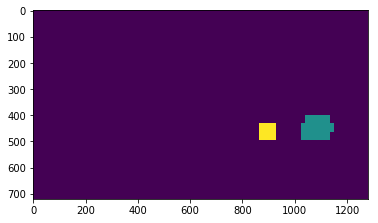

In [18]:
from scipy.ndimage.measurements import label
labels = label(thresholded_heatmap)
plt.imshow(labels[0])

In [ ]:
labels[1]

In [1]:
from run import *
%matplotlib inline

In [2]:
checking = plt.imread('test_images/test6.jpg')
obj = find_cars()

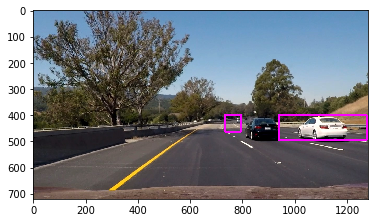

In [3]:
see, heat = obj.process_image(checking)
plt.imshow(see)